# KNN Project


## The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('sonar.all-data.csv')

In [4]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Data Exploration

/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_32022/2466139553.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm')


<Axes: >

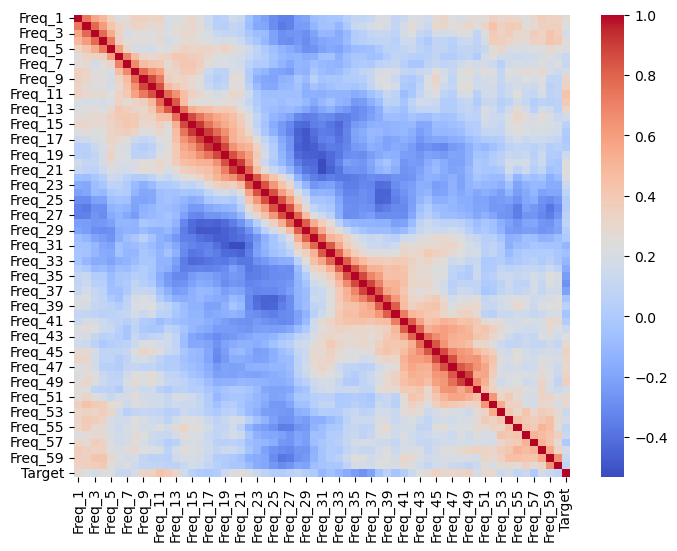

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
df['Label'].unique()

array(['R', 'M'], dtype=object)

In [9]:
df['Target'] = df['Label'].map({'R':0,'M':1})

In [12]:
np.abs(df.corr()['Target']).sort_values().tail(6)

/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_32022/2509837705.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.abs(df.corr()['Target']).sort_values().tail(6)


Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.


In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
X = df.drop(['Target','Label'],axis=1)
y = df['Label']

In [15]:
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [17]:
scaler = StandardScaler()

In [18]:
knn = KNeighborsClassifier()

In [19]:
operations = [('scaler',scaler),('knn',knn)]

In [20]:
from sklearn.pipeline import Pipeline

In [21]:
pipe = Pipeline(operations)

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
k_values = list(range(1,30))

In [24]:
param_grid = {'knn__n_neighbors': k_values}

In [25]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [26]:
full_cv_classifier.fit(X_cv,y_cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [27]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [31]:
pd.DataFrame(full_cv_classifier.cv_results_)['mean_test_score']

0     0.845377
1     0.780654
2     0.775249
3     0.759175
4     0.759317
5     0.748222
6     0.759459
7     0.716643
8     0.711380
9     0.684211
10    0.700427
11    0.684353
12    0.684495
13    0.679090
14    0.695306
15    0.689900
16    0.711380
17    0.700427
18    0.722048
19    0.679090
20    0.700711
21    0.695306
22    0.695306
23    0.684637
24    0.684780
25    0.679232
26    0.674111
27    0.657752
28    0.668563
Name: mean_test_score, dtype: float64

<Axes: >

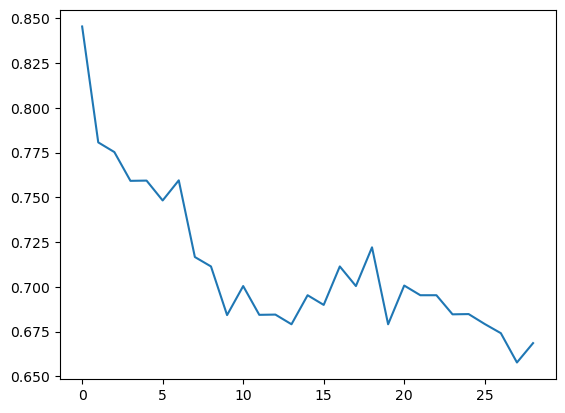

In [34]:
pd.DataFrame(full_cv_classifier.cv_results_)['mean_test_score'].plot()

Text(0, 0.5, 'Accuracy')

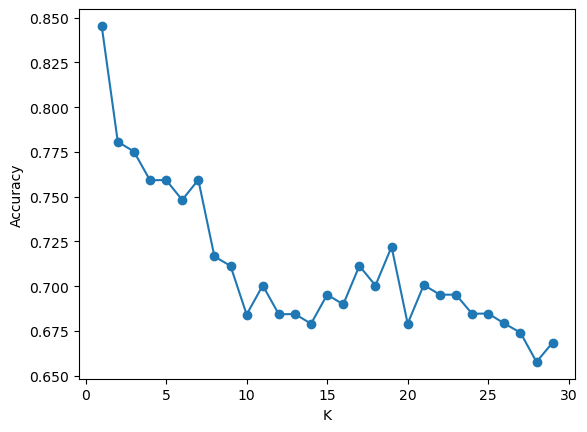

In [29]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

### Final Model Evaluation

In [35]:
pred = full_cv_classifier.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [37]:
confusion_matrix(y_test,pred)

array([[12,  1],
       [ 1,  7]])

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

